# FIFA World Cup Analysis & Visualization

## Table of Contents 

#### Part 1: Import modules, load the data and data clearning
#### Part 2: Explore Data with insights
- 2.1 Attendence in World Cup History
- 2.2 Country Team, Matches in World Cup
- 2.3 Which continents are referees from?
- 2.4 Considering referee is continental neutral or not, the results will be different? 

### Part 1:Import modules, load the data and data clearning

### Import modules

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import Counter

The FIFA World Cup is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA). The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

We got these data from Kaggle. https://www.kaggle.com/abecklas/fifa-world-cup, we also input the world cup result from 2018 so we can provide updated analysis.we would like to examine the data further to learn more from it.

In [31]:
#matches = pd.read_csv('/Users/guyuanyuan/Downloads/FIFA/WorldCupMatches(NEW).csv')
#worldcups = pd.read_csv('/Users/guyuanyuan/Downloads/FIFA/WorldCups.csv')
#players = pd.read_csv('/Users/guyuanyuan/Downloads/FIFA/WorldCupPlayers.csv')
#allocation = pd.read_csv('/Users/guyuanyuan/Downloads/FIFA/world cup allocation.csv', index_col='Year')

In [32]:
matches = pd.read_csv('/Users/xiangzhang/Desktop/Summer 2018/Data Viz/Group project 2/russian2018.csv')
worldcups = pd.read_csv('/Users/xiangzhang/Desktop/Summer 2018/Data Viz/Group project 2/WorldCups.csv')
players = pd.read_csv('/Users/xiangzhang/Desktop/Summer 2018/Data Viz/Group project 2/WorldCupPlayers.csv')
allocation = pd.read_csv('/Users/xiangzhang/Desktop/Summer 2018/Data Viz/Group project 2/world cup allocation.csv', index_col='Year')

In [33]:
pd.options.display.max_columns = None

### Data Cleaning & Feature Engineering

**Steps explained:**
- dropna removes all na values in the dataset
- str.replace removes some special characters on the team name
- Due to some historical reasons, we have combined Germany FR with Germany, and corrected some countries name
- we created a continential counties list for future analysis

In [34]:
matches = matches.dropna(how='all')

In [35]:
matches['Home Team Name'] = matches['Home Team Name'].str.replace('rn">', '')
matches['Away Team Name'] = matches['Away Team Name'].str.replace('rn">', '')

In [36]:
matches["Home Team Name"]=matches["Home Team Name"].replace(["Germany FR","Yugoslavia","Serbia and Montenegro",
                                                             "Soviet Union","Czechoslovakia","C•À_te d'Ivoire",
                                                            "IR Iran"],
                                                            ["Germany","Serbia","Serbia","Russia","Czech Republic",
                                                            "Côte d’Ivoire","Iran"])
matches["Away Team Name"]=matches["Away Team Name"].replace(["Germany FR","Yugoslavia","Serbia and Montenegro",
                                                             "Soviet Union","Czechoslovakia","C•À_te d'Ivoire",
                                                            "IR Iran"],
                                                            ["Germany","Serbia","Serbia","Russia","Czech Republic",
                                                            "Côte d’Ivoire","Iran"])
matches["Home Team Initials"]=matches["Home Team Initials"].replace(["FRG","YUG","SCG","URS","SCG","TCH"],
                                                                    ["GER","SRB","SRB","RUS","SRB","CZE"])
matches["Away Team Initials"]=matches["Away Team Initials"].replace(["FRG","YUG","SCG","URS","SCG","TCH"],
                                                                    ["GER","SRB","SRB","RUS","SRB","CZE"])
worldcups["Winner"]=worldcups["Winner"].replace("Germany FR","Germany")
worldcups["Runners-Up"]=worldcups["Runners-Up"].replace("Germany FR","Germany")
worldcups["Third"]=worldcups["Third"].replace("Germany FR","Germany")
worldcups["Fourth"]=worldcups["Fourth"].replace("Germany FR","Germany")
players["Team Initials"]=players["Team Initials"].replace("FRG","GER")

We create continential countries list.

In [37]:
North_and_Central_America = ['MEX','USA','CAN','CRC','JAM','SLV','CUB','HAI','HON','PAN']
Africa = ['EGY','ETH','SEN','GHA','ALG','LBY','GUA','MRI','RSA','TUN','MLI','ZAM','NIG','NGA','MAR','ANG','TOG','TRI','BEN','CMR','SEY','CIV','GAM','ZAI']
Europe = ['BEL','FRA','NED','ITA','SWE','AUT','GER','SUI','HUN','ENG','ISL','TCH','ESP','SCO','WAL','CZE','UKR','BIH','SVN','IRL','POR','FRG','YUG','DEN','GRE','FIN','URS','NOR','RUS','SVK','SRB','ISR','CRO','SCG','POL','BUL','NIR','ROU','GDR','TUR']
South_America = ['URU','ARG','CHI','BRA','BOL','PER','VEN','COL','PAR','ECU']
Asia_and_Oceania = ['SIN','IRN','AUS','SYR','BHR','HKG','JPN','UAE','THA','INH','KSA','KUW','KOR','CHN','UZB','NZL','PRK','IRQ']

## Part 2:Explore Data with insights

### Question 1: How many people attend the world cup game?

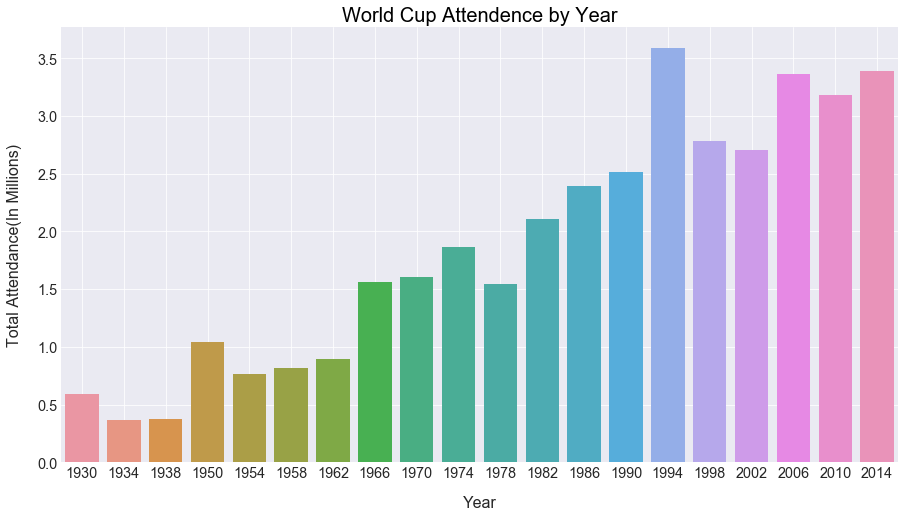

In [38]:
sns.set_style("darkgrid")
matches1=matches[matches.Year <= 2014]
matches1 = matches1.drop_duplicates(subset="MatchID", keep="first")
attendence = matches1.groupby("Year")["Attendance"].sum().reset_index()
attendence["Year"] = attendence["Year"].astype(int)
plt.figure(figsize=(15,8))
sns.barplot(attendence["Year"],attendence["Attendance"]/1000000, linewidth=1)
plt.ylabel("Total Attendance(In Millions)", labelpad=15,fontsize=16)
plt.xlabel("Year", labelpad=15,fontsize=16)
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.grid(True)
plt.title("World Cup Attendence by Year",color='black',fontsize=20)
plt.show();

**Insight**
- The tournament has 16 teams at first, was expanded to 24 teams in 1982, and then to 32 in 1998. We can see that the audience increases as the number of teams increase. For example, there is a big increase in total attendence in 1982 compare the 1978, 1994 USA World Cup has the highest total attendence overall，the probable reason is that the stadiums in the USA have higher capacities. 2014 World Cup has the second highest total attendence.

### Question 2: Country Team, Matches in World Cup

#### Question 2.1 : How many country teams ever played in world cup?

- We pick the Home Team and Away Team out, and calculate the number of unique teams.

In [39]:
team = np.concatenate((matches['Home Team Initials'].unique(), matches['Away Team Initials'].unique()),axis = 0)
unique_team = set(team)
unique_team_count = len(unique_team)
unique_team_count

79

#### Question 2.2 : Which country team attended most?
- For each world cup year, we built a list of country teams, and count values for each country team.

In [40]:
year_team = {}
for i in matches.Year.unique():
    year_team[i] = set(np.concatenate((matches[matches['Year']==i]['Home Team Name'].unique(), 
                                            matches[matches['Year']==i]['Away Team Name'].unique()),axis = 0))
    
year_team_new = []
for year in year_team.keys():
    year_team_new.append(list(year_team[year]))
    
team_attendence_list = [team for sublist in year_team_new for team in sublist]

In [41]:
Counter(team_attendence_list).most_common(3)

[('Brazil', 21), ('Germany', 19), ('Italy', 18)]

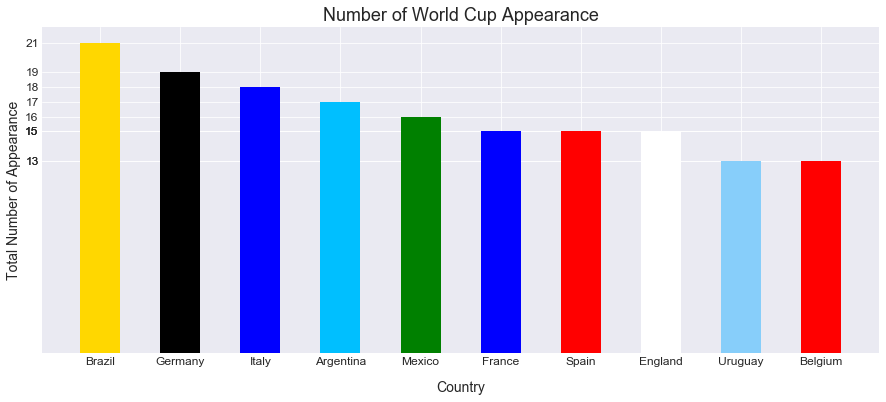

In [42]:
labels, values = zip(*Counter(team_attendence_list).most_common(10))
indexes = np.arange(len(labels))
width = 0.5
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
plt.bar(indexes, values, width, color=['gold', 'black', 'blue', 'deepskyblue', 'green', 'b',
                                       'red', 'white', 'lightskyblue', 'r'])
plt.xticks(indexes, labels, fontsize = 'large')
plt.yticks(values,fontsize = 'large')
plt.title("Number of World Cup Appearance",fontsize=18)
plt.xlabel("Country",fontsize = 14,labelpad = 14)
plt.ylabel("Total Number of Appearance",fontsize = 14)
plt.show();

#### Question 2.3 : Which continent has most countries ever played in world cup?

In [52]:
year_team = {}
for i in matches.Year.unique():
    year_team[i] = set(np.concatenate((matches[matches['Year']==i]['Home Team Initials'].unique(), 
                                            matches[matches['Year']==i]['Away Team Initials'].unique()),axis = 0))
year_team_new = []
for year in year_team.keys():
    year_team_new.append(list(year_team[year]))
team_attendence_list = [team for sublist in year_team_new for team in sublist]

In [53]:
labels, values = zip(*Counter(team_attendence_list).most_common())
data = {'Team':labels, 'Num_of_Attendence':values}
Num_Attendence = pd.DataFrame(data)

In [54]:
def continent(c):
  if c['Team'] in North_and_Central_America:
    return 'North and Central America'
  elif c['Team'] in Europe:
    return 'Europe'
  elif c['Team'] in Africa:
    return 'Africa'
  elif c['Team'] in South_America:
    return 'South America'
  elif c['Team'] in Asia_and_Oceania:
    return 'Asia and Oceania'
  else:
    return 'o'

Num_Attendence['Continent'] = Num_Attendence.apply(continent, axis=1)

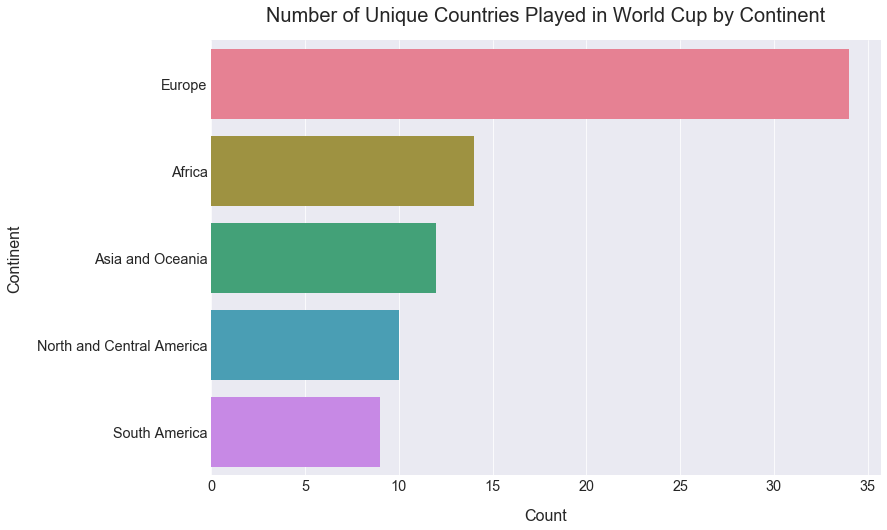

In [59]:
Num_Attendence_Continential=Num_Attendence.groupby('Continent').size().sort_values(ascending=False).reset_index()
Num_Attendence_Continential.columns = ['Continent', 'NumOfTeam']
plt.figure(figsize=(12,8))
sns.barplot(y=Num_Attendence_Continential["Continent"], x=Num_Attendence_Continential["NumOfTeam"], palette="husl",
                 linewidth=1)
plt.yticks(fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.ylabel("Continent", labelpad=15,fontsize=16)
plt.xlabel("Count", labelpad=15,fontsize=16)
plt.title("Number of Unique Countries Played in World Cup by Continent", fontsize=20,y=1.03)
plt.show();

#### Question 2.4 : Which team played most game?

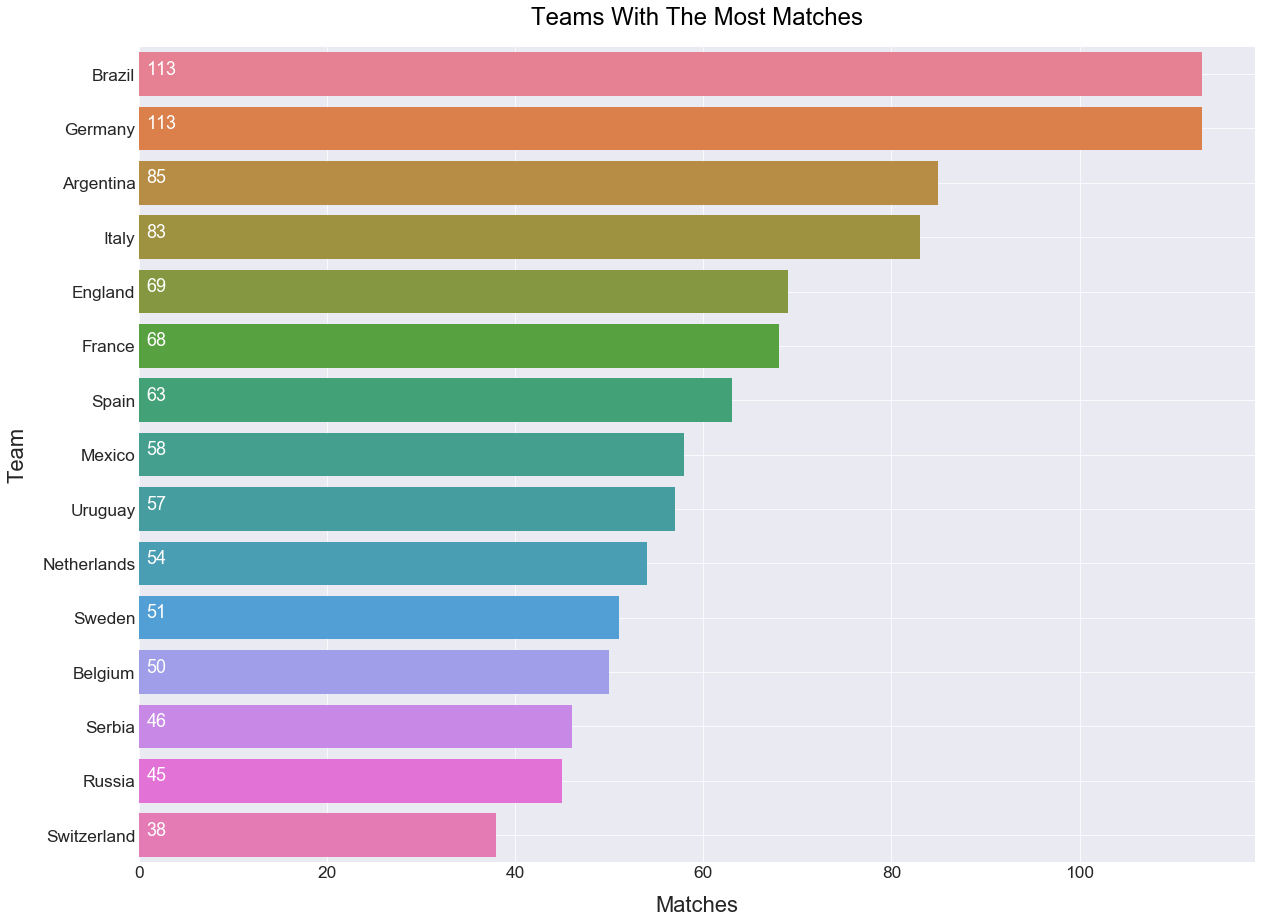

In [64]:
sns.set_style("darkgrid")
Home = matches["Home Team Name"].value_counts().reset_index()
Home.columns = ["Team","Matches"]
Away = matches["Away Team Name"].value_counts().reset_index()
Away.columns = ["Team","Matches"]
MatchTeam = pd.concat([Home,Away],axis=0)
MatchTeam = MatchTeam.groupby("Team")["Matches"].sum().reset_index().sort_values(by="Matches",ascending=False)
plt.figure(figsize=(20,15))
plot = sns.barplot("Matches","Team",data=MatchTeam[:15],palette="husl",
                 linewidth=2)
plt.grid(True)
plt.title("Teams With The Most Matches",color='Black',fontsize=24,y=1.02)
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')
plt.ylabel("Team", labelpad=15,fontsize=22)
plt.xlabel("Matches", labelpad=15,fontsize=22)
for i,j in enumerate(MatchTeam["Matches"][:15].astype(str)):
    plot.text(.8,i,j,fontsize=18,color="white")
plt.show();

**Insights:**
- There are 79 country teams have ever played in World Cup.
- Brazil attends most with 21 times.
- Europe has the most country teams(38) ever played in World Cup, Africa is the second. This data implies that in Europe and Africa, most country teams are competent，the competency pattern changed very often. While in South America, the continent soccer is very popular, it does not changed a lot.
- Brazil and Germany played most with 113 games, which implies they usually qualify from group games and play a lot in playoff games. So it's a strong indicator of soccer strength.

### Question 3: Which continents are referees from?

Extract referee nationality from python string

In [65]:
matches['referee_nation_Initials'] = matches['Referee'].str.extract('.*\((.*)\).*')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [66]:
len(matches['referee_nation_Initials'].unique())

85

Category referee nationality into continential

In [71]:
def referee_continent(c):
  if c['referee_nation_Initials'] in North_and_Central_America:
    return 'North and Central America'
  elif c['referee_nation_Initials'] in Europe:
    return 'Europe'
  elif c['referee_nation_Initials'] in Africa:
    return 'Africa'
  elif c['referee_nation_Initials'] in South_America:
    return 'South America'
  elif c['referee_nation_Initials'] in Asia_and_Oceania:
    return 'Asia and Oceania'
  else:
    return 'o'

matches['referee_continent'] = matches.apply(referee_continent, axis=1)

We can see the referees become more geographical diverse as time passby. 

In [72]:
matches.groupby(['Year','referee_continent']).size()

Year  referee_continent        
1930  Europe                        6
      South America                12
1934  Europe                       17
1938  Europe                       18
1950  Europe                       19
      South America                 3
1954  Europe                       24
      South America                 2
1958  Europe                       32
      South America                 3
1962  Europe                       26
      North and Central America     3
      South America                 3
1966  Africa                        1
      Europe                       27
      North and Central America     1
      South America                 3
1970  Africa                        2
      Europe                       21
      North and Central America     4
      South America                 5
1974  Africa                        2
      Asia and Oceania              3
      Europe                       24
      North and Central America     2
      South Americ

We also combine the number of teams in World Cup after 2000 with the number of referees to see the difference.

In [104]:
matches[matches['Year']>=2010].groupby(['Year','referee_continent']).size().unstack(1)

referee_continent,Africa,Asia and Oceania,Europe,North and Central America,South America
Year,,,,,
2010,8,12,25,5,14
2014,9,13,33,10,15
2018,7,10,24,8,15


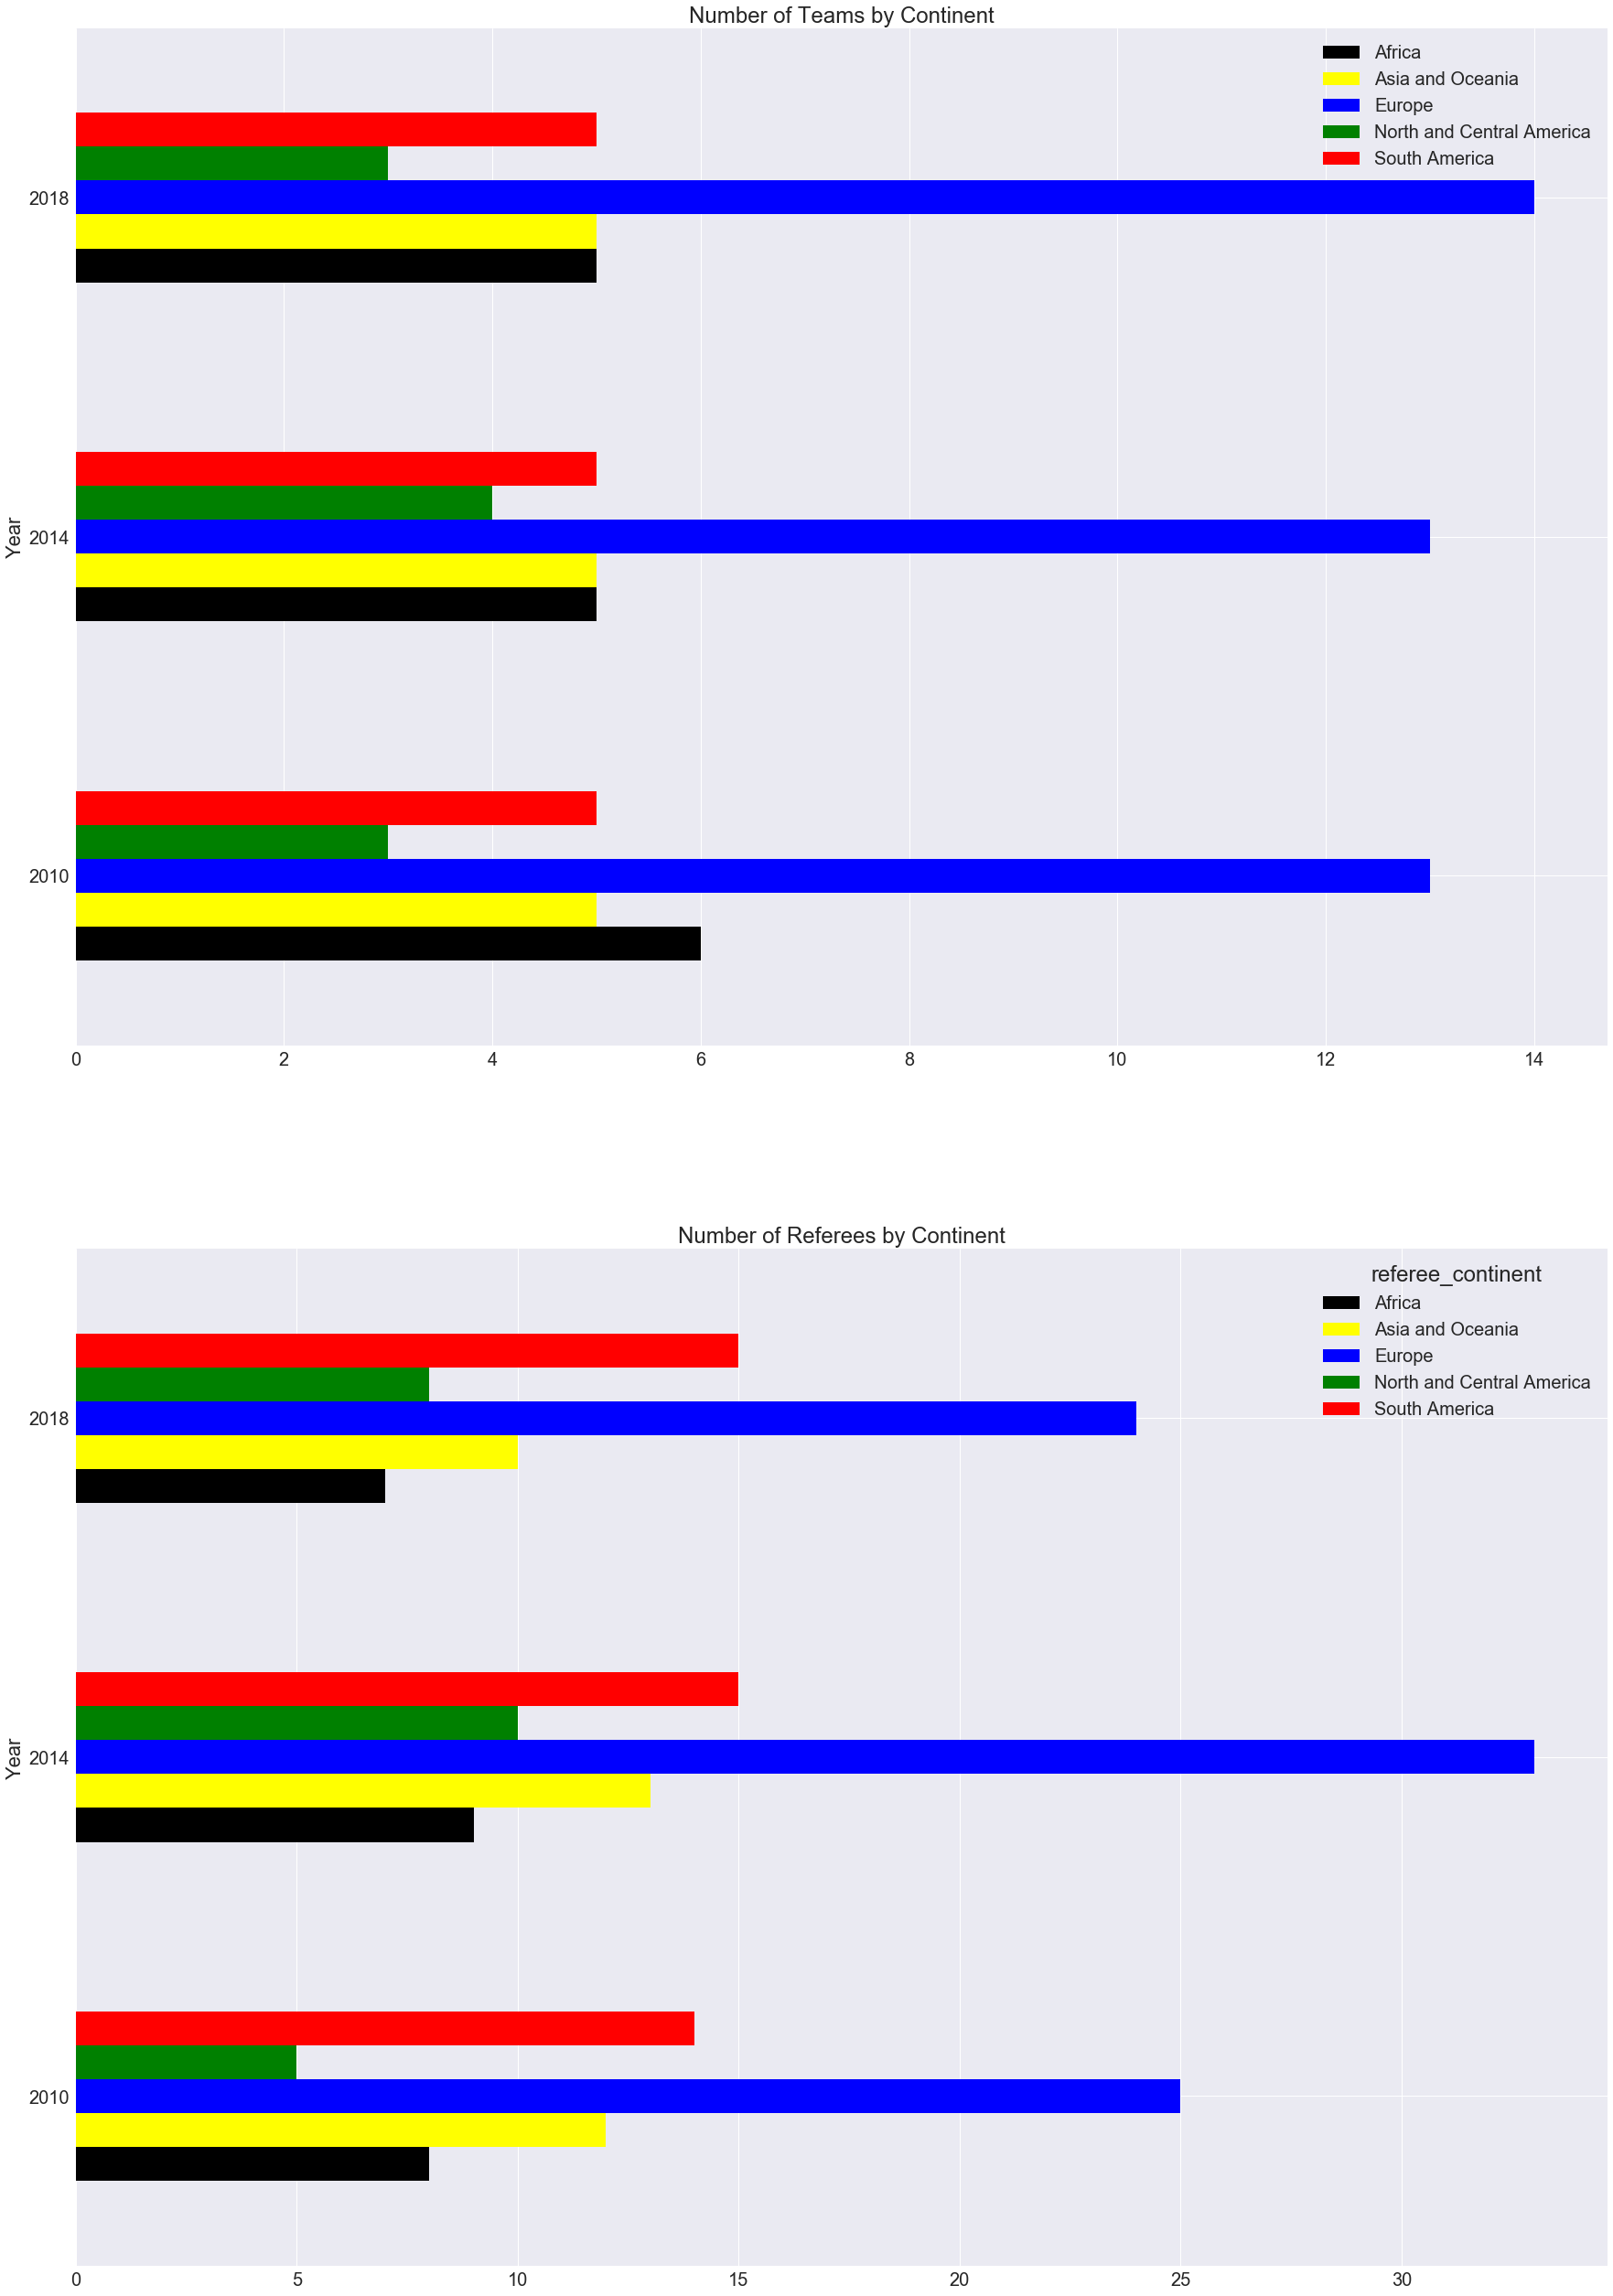

In [118]:
fig, axarr = plt.subplots(2, 1, figsize=(30, 45))
allocation.iloc[2:,].plot.barh(ax=axarr[0],color=('black','yellow','blue','green','red'))
axarr[0].set_title("Number of Teams by Continent", fontsize=24)
axarr[1].set_title("Number of Referees by Continent", fontsize=24)
matches[matches['Year']>=2010].groupby(['Year','referee_continent']).size().unstack(1).plot.barh(ax=axarr[1],color=(
        'black','yellow','blue','green','red'))
plt.show();

#### Insights:
-  Europe has most teams and also most referees.
-  Africa, Asia_and_Oceania and South America have second most teams.
-  South America and Asia_and_Oceania has more referees than Africa.

### Question 4: Considering referee is continential neutral or not, the results will be different? 

We convert the home team and away team into continential category.

In [77]:
def home_team_continent(c):
  if c['Home Team Initials'] in North_and_Central_America:
    return 'North and Central America'
  elif c['Home Team Initials'] in Europe:
    return 'Europe'
  elif c['Home Team Initials'] in Africa:
    return 'Africa'
  elif c['Home Team Initials'] in South_America:
    return 'South America'
  elif c['Home Team Initials'] in Asia_and_Oceania:
    return 'Asia and Oceania'
  else:
    return '0'

matches['home_team_continent'] = matches.apply(home_team_continent, axis=1)

In [78]:
def away_team_continent(c):
  if c['Away Team Initials'] in North_and_Central_America:
    return 'North and Central America'
  elif c['Away Team Initials'] in Europe:
    return 'Europe'
  elif c['Away Team Initials'] in Africa:
    return 'Africa'
  elif c['Away Team Initials'] in South_America:
    return 'South America'
  elif c['Away Team Initials'] in Asia_and_Oceania:
    return 'Asia and Oceania'
  else:
    return '0'

matches['away_team_continent'] = matches.apply(away_team_continent, axis=1)

### Continential relation between referee and team

If the home and away team are both from, or both not from the continent which referee also comes from, we define this condition to be continential neutral. Otherwise, the referee would be either home team continential or away team continential.

In [79]:
def referee_continental_neutral(c):
  if c['home_team_continent'] == c['referee_continent'] and c['away_team_continent'] == c['referee_continent']:
    return 'Continental Neutral'
  elif c['home_team_continent'] == c['referee_continent']:
    return 'Home same continent'
  elif c['away_team_continent'] == c['referee_continent']:
    return 'Away same continent'
  else:
    return 'Continental Neutral'

matches['referee_continental_neutral'] = matches.apply(referee_continental_neutral, axis=1)

In [80]:
matches['referee_continental_neutral'].value_counts()

Continental Neutral    662
Home same continent    133
Away same continent    121
Name: referee_continental_neutral, dtype: int64

We also give out game results by doing feature engineering.

In [81]:
def game_results(c):
  if c['Home Team Goals'] > c['Away Team Goals']:
    return 'Home Win'
  elif c['Home Team Goals'] == c['Away Team Goals']:
    return 'Draw'
  else: 
    return 'Away Win'

matches['game_results'] = matches.apply(game_results, axis=1)

We plot the games results by different referee continential neutral conditions

In [82]:
game_results_referee_neutral = matches[matches['referee_continental_neutral']=='Continental Neutral'].groupby(
    'game_results').size().to_frame()
game_results_referee_home = matches[matches['referee_continental_neutral']=='Home same continent'].groupby(
    'game_results').size().to_frame()
game_results_referee_neutral.columns = [' ']
game_results_referee_home.columns = [' ']

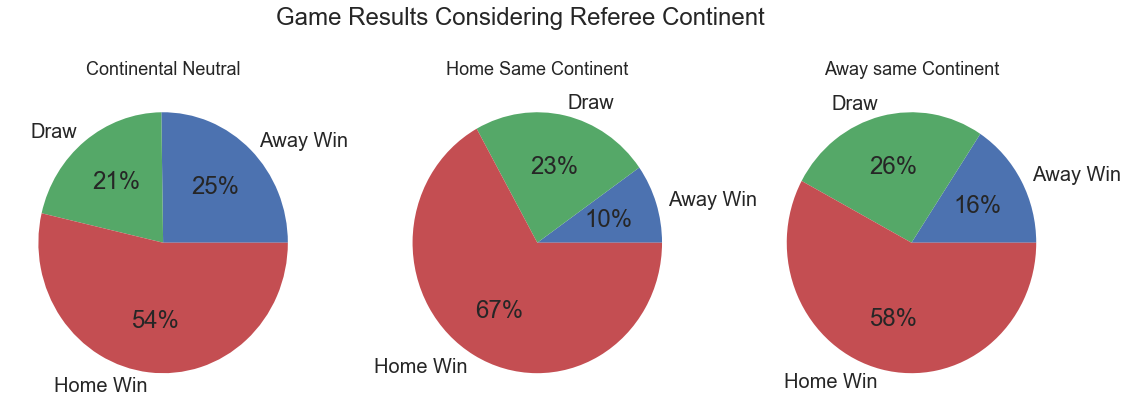

In [83]:
fig, axarr = plt.subplots(1, 3, figsize=(19, 6))
sns.set(font_scale = 2)

game_results_referee_neutral.plot.pie(
    ax=axarr[0], autopct='%1.0f%%', legend=False, subplots=True)
axarr[0].set_title("Continental Neutral", fontsize=18)
plt.ylabel("")
game_results_referee_home.plot.pie(
    ax=axarr[1], legend=False, autopct='%1.0f%%',subplots=True)
axarr[1].set_title("Home Same Continent", fontsize=18)
matches[matches['referee_continental_neutral']=='Away same continent'].groupby('game_results').size().plot.pie(
    ax=axarr[2],autopct='%1.0f%%',subplots=True)
axarr[2].set_title("Away same Continent", fontsize=18)
fig.suptitle('Game Results Considering Referee Continent', fontsize=24, y=1.05)
plt.ylabel("")
plt.show();

#### Insights:
-  If your country team is in home position, you are more likely to win when the referee comes from your continent, and your opponent does not.
-  If your country team is in away position, it's best have a continential neutral referee.Otherwise it's better to have a referee comes from your continent.